In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

%matplotlib inline

In [2]:
np.random.seed(42)
plt.rcParams['figure.figsize'] = (16, 9)

# Creating a sample dataset with 4 clusters
X, y = make_blobs(n_samples=800, n_features=2, centers=4, cluster_std=0.5, random_state=0)
rng = np.random.RandomState(13)
X = np.dot(X, rng.randn(2, 2))

In [18]:
y[:4]

array([3, 2, 0, 1])

array([0, 1, 3, 2], dtype=int32)

In [20]:
y_dbscan[:4]

array([0, 1, 2, 3])

In [21]:
y_gmm[:4]

array([2, 0, 1, 3])

/home/lerkoah/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


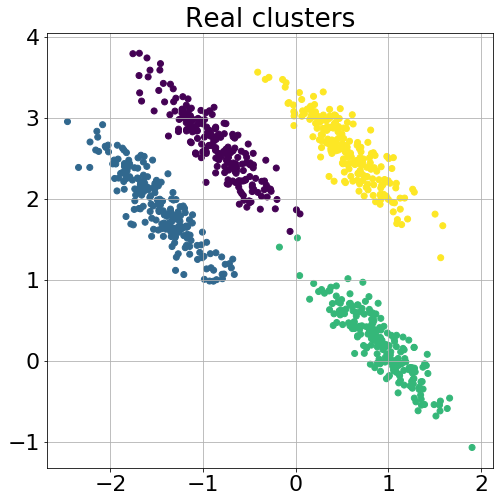

In [96]:
import matplotlib 
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}

matplotlib.rc('font', **font)

fig = plt.figure(figsize=(8,8))
mycmap = 'viridis'
plt.scatter(X[:,0], X[:,1], c=y, cmap=mycmap)
plt.grid('on')
plt.title('Real clusters')
plt.savefig('real_clusters.pdf', format='pdf')

# Kmeans

In [4]:
from sklearn.cluster import KMeans

In [5]:
kmeans = KMeans(n_clusters=4)
kmeans = kmeans.fit(X)

In [6]:
y_kmeans = kmeans.predict(X)

[3 2 0 1]
[2 0 1 3]
[2 0 1 3]


/home/lerkoah/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


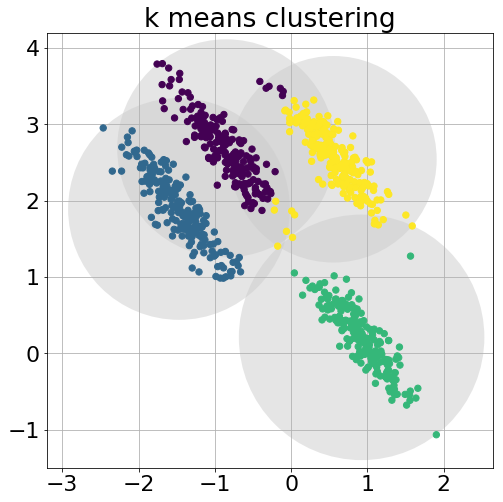

In [53]:
from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    labels_corrected = labels+(y[0]-labels[0])*((labels==labels[0]).astype(int))+(y[1]-labels[1])*((labels==labels[1]).astype(int))+(y[2]-labels[2])*((labels==labels[2]).astype(int))+(y[3]-labels[3])*((labels==labels[3]).astype(int))
    print(labels[:4])

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels_corrected, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))
fig = plt.figure(figsize=(8,8))
plot_kmeans(kmeans, X, n_clusters=3)
plt.grid('on')
plt.ylim([-1.5,4.2])
plt.title('k means clustering')
plt.savefig('kmeans.pdf', format='pdf')

# DBSCAN

In [54]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.2, min_samples=7).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
y_dbscan = db.labels_
labels = y_dbscan
labels_corrected = labels+(y[0]-labels[0])*((labels==labels[0]).astype(int))+(y[1]-labels[1])*((labels==labels[1]).astype(int))+(y[2]-labels[2])*((labels==labels[2]).astype(int))+(y[3]-labels[3])*((labels==labels[3]).astype(int))


/home/lerkoah/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


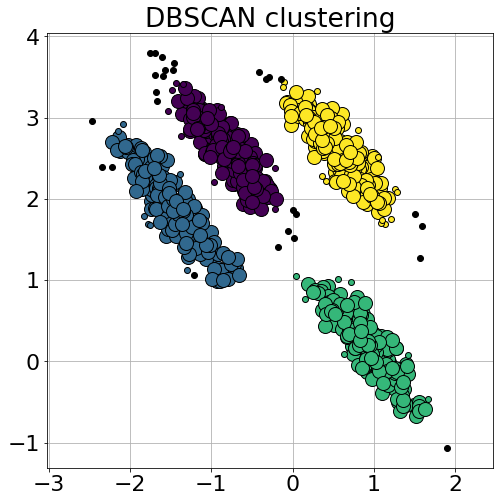

In [94]:
# Black removed and is used for noise instead.
unique_labels = set(y_dbscan)
colors = [plt.cm.viridis(each)
          for each in np.linspace(0, 1, 4)]
colors = np.vstack([colors, [0, 0, 0, 1]])
sorted_index = np.argsort([2,3,1,0,4])
#print(y_dbscan[:4])
#print(labels_corrected[:4])
colors = colors[sorted_index,:]
fig = plt.figure(figsize=(8,8))
for k, col in zip(unique_labels, colors):
#     if k == -1:
#         # Black used for noise.
#         col = [0, 0, 0, 1]
    class_member_mask = (y_dbscan == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)
    plt.axis('equal')
    plt.grid('on')
plt.title('DBSCAN clustering')
plt.savefig('dbscan.pdf', format='pdf')

In [64]:
sorted_index = np.argsort([0,1,2,4,3])
colors[sorted_index,:]

array([[ 0.267004,  0.004874,  0.329415,  1.      ],
       [ 0.190631,  0.407061,  0.556089,  1.      ],
       [ 0.20803 ,  0.718701,  0.472873,  1.      ],
       [ 0.      ,  0.      ,  0.      ,  1.      ],
       [ 0.993248,  0.906157,  0.143936,  1.      ]])

In [11]:
unique_labels

{-1, 0, 1, 2, 3}

# GMM

In [12]:
# from sklearn.mixture import GMM
from sklearn.mixture import GaussianMixture as GMM


gmm = GMM(n_components=4, random_state=1).fit(X)
y_gmm = gmm.predict(X)

/home/lerkoah/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


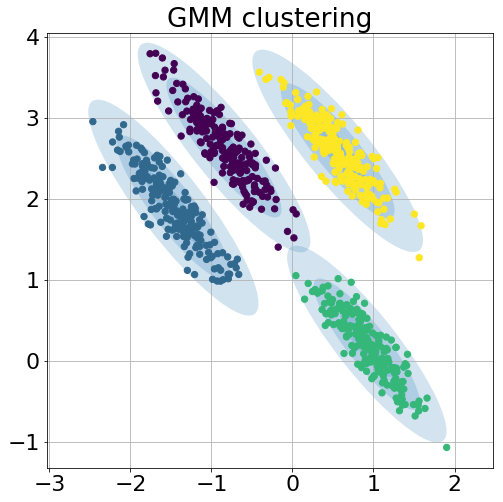

In [57]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    # ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    labels_corrected = labels+(y[0]-labels[0])*((labels==labels[0]).astype(int))+(y[1]-labels[1])*((labels==labels[1]).astype(int))+(y[2]-labels[2])*((labels==labels[2]).astype(int))+(y[3]-labels[3])*((labels==labels[3]).astype(int))
    
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels_corrected, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor, ax=ax)
    
    return ax
# plt.scatter(X[:,0], X[:,1], c=y_gmm, cmap=mycmap)
fig = plt.figure(figsize=(8,8))
ax = plt.subplot(111)
ax = plot_gmm(gmm, X, ax=ax)
ax.grid('on')
ax.set_title('GMM clustering')
#ax.set_xlim([,.1])
fig.savefig('gmm.pdf', format='pdf')